#### STDLIB

In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy.ndimage.filters import median_filter
import glob
import os

data_path = '/Volumes/Vega/APO/Q4JH03/UT161120/ARCTIC/os-remove/'
ref_star_path = '/Users/Alex/Desktop/fourchettes/APO/wasp44b ref stars.txt'
cat_name = 'wasp44b'
fileDir = 'C:\\Users\\sotzeks1\\Documents\\APO\\Q4JH03\\UT161120\\ARCTIC\\'
catDir = 'C:\\Users\\sotzeks1\\Documents\\APO\\cats\\'+cat_name+'\\'
infile_list = glob.glob(fileDir+cat_name+'*.fits')
catfile_list = glob.glob(catDir+cat_name+'*.cat')
fits_name = 'wasp44b_end_i_24.'
num_file = len(infile_list)
num_cats = len(catfile_list)
print('Number of files = ',num_file)
print('Number of cats = ',num_cats)
print(catfile_list[0])


Number of files =  67
Number of cats =  120
C:\Users\sotzeks1\Documents\APO\cats\wasp44b\wasp44b478.cat


In [ ]:
for inname in infile_list:
    outname = fileDir+'oscan-remove\\'+os.path.split(inname)[1]
    remove_oscan_file(inname, outname)

lbl_ft_sz, title_ft_sz = 14, 14

def flux_ratio(mag):
    return 10 ** (-0.4 * mag)

f = fits.open(data_path + fits_name + '0478.fits')
print f[0].header['DATE-OBS'].split('T')[1]

#### Find target and refstars

In [2]:
ref_ra, ref_dec = np.loadtxt(ref_star_path, usecols=(0, 1), unpack=True, skiprows=1)

target_mag, ref_mag = np.zeros(num_file), np.zeros((10, num_file))
target_magerr, ref_magerr = np.zeros(num_file), np.zeros((10, num_file))

target_coord = SkyCoord('00 15 37 -11 56 20', unit=(u.hourangle, u.deg)).to_string('decimal').split()
target_ra, target_dec = float(target_coord[0]), float(target_coord[1])

for name in catfile_list:
    mag, magerr, ra, dec = np.loadtxt(name, skiprows=9, usecols=(3, 4, 7, 8), unpack=True)
    
    target_index = SkyCoord(ra=target_ra, dec=target_dec, unit=(u.degree)).match_to_catalog_3d(SkyCoord(ra=ra, dec=dec, unit=(u.degree)))
    target_index = int(target_index[0])
    target_mag[n], target_magerr[n] = mag[target_index], magerr[target_index]
    
    for i in range(len(ref_ra)):
        ref_index = SkyCoord(ra=ref_ra[i], dec=ref_dec[i], unit=(u.degree)).match_to_catalog_3d(SkyCoord(ra=ra, dec=dec, unit=(u.degree)))
        #print i, n, ref_index
        ref_index = int(ref_index[0])
        ref_mag[i, n], ref_magerr[i, n] = mag[ref_index], magerr[ref_index]

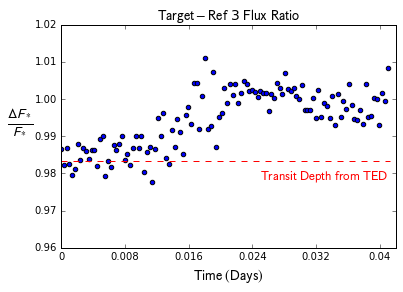

'Inferred' transit depth: 0.0148


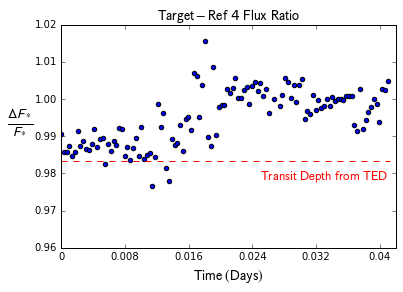

'Inferred' transit depth: 0.0135


In [111]:
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

for j in range(2, 4): 
    med = median_filter(target_mag[:-1] - ref_mag[j, :-1], 1)
    crit = (med > -1)
    mean_out = np.mean(med[crit][-60:])
    time_inc = 1. / (120 * 24)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.scatter(np.arange(0, num_file - 1) * time_inc, flux_ratio(med - mean_out))
    ax.plot([0, 119 * time_inc], [flux_ratio(0.0183), flux_ratio(0.0183)], linestyle='--', color='r')
    ax.set_ylim(0.96, 1.02)
    ax.set_xlim(0, 0.042)
    ax.set_title(r'$\rm{Target - Ref} \ $' + str(j + 1) + r'$ \ \rm{Flux \ Ratio}$', size=title_ft_sz)
    ax.set_ylabel(r'$\frac{\Delta F_*}{F_*}$', size=lbl_ft_sz + 6, rotation=0)
    ax.text(0.025, flux_ratio(0.0183) - 0.005, r'$\rm{Transit \ Depth \ from \ TED}$', color='r', size=lbl_ft_sz - 1)
    ax.yaxis.labelpad = 14
    ax.set_xlabel(r'$\rm{Time \ (Days)}$', size=lbl_ft_sz)
    ax.set_xticks(np.linspace(0, 0.04, 6))
    ax.set_xticklabels(['0', '0.008', '0.016', '0.024', '0.032', '0.04'])
    plt.show()
    print "'Inferred' transit depth:", np.median(med[crit][:50]) - np.median(med[crit][-50:])

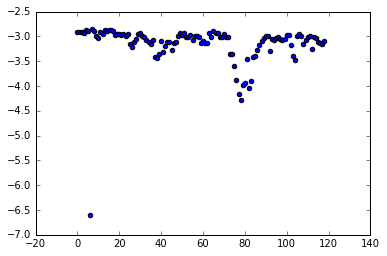

In [288]:
plt.scatter(range(0, num_file - 1), ref_mag[2, :-1] - ref_mag[4, :-1])
#plt.ylim(-0.025, 0.04)
plt.show()

In [118]:
print np.sqrt(np.mean(target_magerr) ** 2 + np.mean(ref_magerr[2]) ** 2)

0.000181551951549
